# Inteligentná analýza údajov 2019/2020 - Projekt
## Ondrej Jedinák, František Tibenský

In [21]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.stats.api as sms

from sklearn import preprocessing
from IPython.display import display

pd.options.display.max_colwidth=130
pd.set_option("display.max_columns", None)

personal_data = pd.read_csv("data/personal_train.csv", index_col=0)
data = pd.read_csv("data/other_train.csv", index_col=0)

# Dataset personal_train.csv

In [22]:
display(personal_data.head(3))
display(personal_data.info())
"Spolu tabuľka obsahuje "+str(len(personal_data))+" záznamov."

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",58,Male,1961-03-11
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",56,Female,1962/11/20
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",59,Male,11/12/1959


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
name             3933 non-null object
address          3933 non-null object
age              3933 non-null int64
sex              3933 non-null object
date_of_birth    3933 non-null object
dtypes: int64(1), object(4)
memory usage: 184.4+ KB


None

'Spolu tabuľka obsahuje 3933 záznamov.'

V prvej tabuľke sa nachádzajú základné údaje o osobách, konkrétne:
- meno (name)
- adresa (address)
- vek (age)
- pohlavie (sex)
- dátum narodenia (date_of_birth)

In [23]:
display(personal_data.describe(exclude=np.number))
personal_data.describe()

,name,address,sex,date_of_birth
count,3933,3933,3933,3933
unique,3933,3933,2,3712
top,William Sullivan,"45519 Adams Mill\r\nLake Albert, TX 85868",Male,1970-08-18
freq,1,1,2579,4


,age
count,3933.000000
mean,51.816934
std,11.814803
min,-1.000000
25%,44.000000
50%,52.000000
75%,60.000000
max,113.000000


## Meno a adresa

In [24]:
display("Kontrola formátu mien: "+str(personal_data["name"].str.contains("[A-Z][a-z]+ [A-Z][a-z]+").unique()))
display(personal_data["address"].reindex(personal_data["address"].str.len().sort_values().index))
"Kontrola formátu adries: "+str(personal_data["address"].str.contains("\r\n.* [A-Z]{2} [0-9]{5}$").unique())

'Kontrola formátu mien: [ True]'

1498                                                  USS Wu\r\nFPO AP 06027
1506                                                 USNS Le\r\nFPO AE 65139
194                                                 USS Chen\r\nFPO AE 55593
3066                                                USS Soto\r\nFPO AA 42341
21                                                  USNV Kim\r\nFPO AA 96043
2932                                                USNV Cox\r\nFPO AP 28776
3645                                                USNS Cox\r\nFPO AA 02523
1843                                               USS Welch\r\nFPO AP 85658
1797                                               USNS Reed\r\nFPO AA 35967
3074                                               USNV Ward\r\nFPO AP 67729
1385                                               USNV Pope\r\nFPO AA 38226
143                                                USS Jones\r\nFPO AE 94883
3149                                               USS Davis\r\nFPO AE 40485

'Kontrola formátu adries: [ True]'

Tieto atribúty sú obsiahnuté v oboch tabuľkách, čiže ich pravdepodobne budeme môcť neskôr využiť na zlúčenie záznamov medzi tabuľkami.

***name***

Meno a priezvisko subjektu.

Záznamy vyzerajú byť v poriadku, každý sa skladá z dvoch slov oddelených medzerou, z ktorých každé za začína veľkým písmenom za ktorým nasledujú malé.

***address***

Každý záznam reprezentuje adresu v spojených štátoch, pravdepodobne trvalé bydlisko subjektu 

Všetky záznamy sa skladajú z dvoch častí, ktoré sú oddelené znakmi nového riadka("\r\n"), ich formáty však majú niekoľko rôznych typov. Niektoré adresy obsahujú napríklad čísla bytu, alebo sa tu nachádzajú špeciálne vojenské adresy. Každý záznam však obsahuje dvojpísmenové označenie štátu a 5 ciferné poštové číslo.

Žiadne záznamy nie sú prázdne a nezdá sa že by sa tu nachádzali nejaké na prvý pohľad chybné alebo podozrivo krátke adresy.

## Pohlavie

TODO sex

## Vek a dátum narodenia

TODO age, date_of_birth

# Dataset other_train.csv

In [25]:
display(data.head(3))
display(data.info())
"Spolu tabuľka obsahuje "+str(len(data))+" záznamov."



,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Ernest Valles,"698 Miller Gateway Apt. 970\r\nClayside, ND 13457",White,Married-civ-spouse,Adm-clerical,f,10.0,Husband,0.198684,105.859375,0.0,0.222954,Some-college,343789.0,0.0,48.744348,>50K,"{'mean_oxygen':'0.790133779','std_oxygen':'10.13249696','kurtosis_oxygen':'17.68151382','skewness_oxygen':'374.9257754'}",United-States,40.0,0.0,State-gov
1,Michael Kowal,"4784 Walters Extensions\r\nEast Whitney, NH 27458",White,??,Sales,F,13.0,Not-in-family,-0.334631,120.453125,0.0,-0.049047,Bachelors,188957.0,0.0,50.982512,<=50K,"{'mean_oxygen':'18.69147157','std_oxygen':'51.21049055','kurtosis_oxygen':'2.541428789','skewness_oxygen':'4.930561896'}",United-States,40.0,0.0,Self-emp-not-inc
2,Mike Rogers,"068 Baker Estates Apt. 300\r\nRoberttown, NV 50205",White,Married-civ-spouse,Sales,f,13.0,Husband,0.030878,117.257812,0.0,0.121774,Bachelors,112283.0,0.0,42.893263,<=50K,"{'mean_oxygen':'1.150501672','std_oxygen':'11.49825164','kurtosis_oxygen':'16.48789423','skewness_oxygen':'320.6702352'}",United-States,55.0,0.0,Private


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 22 columns):
name                3983 non-null object
address             3983 non-null object
race                3969 non-null object
marital-status      3708 non-null object
occupation          3967 non-null object
pregnant            3971 non-null object
education-num       3570 non-null float64
relationship        3971 non-null object
skewness_glucose    3971 non-null float64
mean_glucose        3973 non-null float64
capital-gain        3967 non-null float64
kurtosis_glucose    3967 non-null float64
education           3965 non-null object
fnlwgt              3969 non-null float64
class               3972 non-null float64
std_glucose         3976 non-null float64
income              3964 non-null object
medical_info        3964 non-null object
native-country      3968 non-null object
hours-per-week      3969 non-null float64
capital-loss        3973 non-null float64
workclass           39

None

'Spolu tabuľka obsahuje 3983 záznamov.'

Druhá tabuľka má 22 atribútov.

Dva sú rovnaké ako v predchádzajúcej
- meno (stĺpec name)
- adresa (address)

Ďalej tu sú údaje o spoločenskom postavení ľudí:
- rasa (race)
- rodinný stav (marital-status)
- povolanie (occupation)
- číslo so zatiaľ nejasným významom súvisiace so vzdelaním (education-num)
- vzťah v domácnosti (relationship)
- kapitálové príjmy (capital-gain)
- dosiahnuté vzdelanie (education)
- príjem (income)
- krajina pôvodu osoby (native-country)
- koľko hodín týždenne pracujú (hours-per-week)
- kapitálová strata (capital-loss)
- v akej sfére (štátnej, súkromnej) pracujú (workclass)

A taktiež o ich zdravotnom stave:
- je osoba tehotná? (pregnant)
- hodnoty hladín glukózy 
 - skewness_glucose
 - mean_glucose
 - kurtosis_glucose
 - std_glucose
- medical_info
- reálna prítomnosť ochorenia (class)


- stĺpec so zatiaľ neznámym významom (fnlwgt)

In [26]:
display(data.describe(exclude=np.number))
data.describe()

,name,address,race,marital-status,occupation,pregnant,relationship,education,income,medical_info,native-country,workclass
count,3983,3983,3969,3708,3967,3971,3971,3965,3964,3964,3968,3965
unique,3933,3933,5,8,15,6,6,24,2,3932,38,16
top,Daniel Martinez,"2919 Nancy Common\r\nGrahamburgh, SC 98783",White,Married-civ-spouse,Prof-specialty,f,Husband,HS-grad,<=50K,"{'mean_oxygen':'2.4966555180000003','std_oxygen':'13.70157897','kurtosis_oxygen':'9.318368709','skewness_oxygen':'124.0774541'}",United-States,Private
freq,3,3,3398,1598,508,3504,1574,1156,3039,2,3548,2465


,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss
count,3570.000000,3971.000000,3973.000000,3967.000000,3967.000000,3969.000000,3972.000000,3976.000000,3969.000000,3973.000000
mean,2.461064,4.213195,101.333680,910.319133,0.951361,187324.615520,0.254280,45.175469,40.128748,75.776743
std,333.105796,9.663943,33.535291,6687.538845,1.611965,104811.125897,0.435511,7.600046,12.101524,378.369019
min,-1600.000000,-1.755332,6.187500,0.000000,-1.641515,19491.000000,0.000000,25.695250,1.000000,0.000000
25%,9.000000,-0.119656,87.835938,0.000000,0.072661,115932.000000,0.000000,40.170613,40.000000,0.000000
50%,10.000000,0.379044,110.710938,0.000000,0.310784,177083.000000,0.000000,45.887636,40.000000,0.000000
75%,13.000000,2.086138,124.171875,0.000000,0.775258,234901.000000,1.000000,50.346566,45.000000,0.000000
max,1600.000000,68.101622,189.734375,99999.000000,8.069522,953588.000000,1.000000,91.206475,99.000000,3900.000000


## Meno a adresa

In [27]:
display("Kontrola formátu mien: "+str(data["name"].str.contains("[A-Z][a-z]+ [A-Z][a-z]+").unique()))
display(data["address"].reindex(data["address"].str.len().sort_values().index))
"Kontrola formátu adries: "+str(data["address"].str.contains("\r\n.* [A-Z]{2} [0-9]{5}$").unique())

'Kontrola formátu mien: [ True]'

1276                                                  USS Wu\r\nFPO AP 06027
3964                                                 USNS Le\r\nFPO AE 65139
3592                                                USS Soto\r\nFPO AA 42341
598                                                 USNV Cox\r\nFPO AP 28776
3879                                                USNV Kim\r\nFPO AA 96043
2611                                                USS Chen\r\nFPO AE 55593
3013                                                USNS Cox\r\nFPO AA 02523
2417                                               USNV Wood\r\nFPO AA 48815
1429                                               USS Adams\r\nFPO AP 40250
3376                                               USNV Pope\r\nFPO AA 38226
54                                                 USS Welch\r\nFPO AP 85658
3532                                               USS Hardy\r\nFPO AA 12503
728                                                USNS Reed\r\nFPO AA 35967

'Kontrola formátu adries: [ True]'

Nevyzerá, že by sa vlastnosti týchto atribútov líšili od tých v druhom datasete.

In [28]:
"Tabuľka obsahuje "+str(len(data[["name","address"]].drop_duplicates()))+" unikátnych kombinácií mena a adresy"

'Tabuľka obsahuje 3933 unikátnych kombinácií mena a adresy'

Celkový počet záznamov je 3983, to znamená že 50 záznamov sú duplikáty. 3933 je tiež rovnaký počet ako je záznamov v druhej tabuľke s osobnými údajmi. V ostatných stĺpcoch môžu však v týchto záznamoch byť aj tak medzi sebou odlišné hodnoty, a teoreticky na jednej adrese môže bývať viac ľudí s rovnakým menom, preto treba skontrolovať ostatné stĺpce skôr ako rozhodneme ako sa duplikátov zbaviť.

## Rasa a pôvod

 White                 3398
 Black                  365
 Asian-Pac-Islander     128
 Amer-Indian-Eskimo      43
 Other                   35
NaN                      14
Name: race, dtype: int64

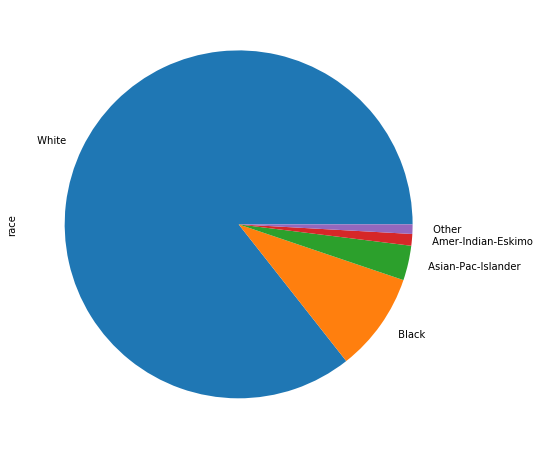

In [29]:
data["race"].value_counts().plot(kind='pie',figsize=(10,8))
data["race"].value_counts(dropna=False)

***race***

Tento stĺpec má 5 možných hodnôt
- White
- Black
- Asian-Pac-Islander
- Amer-Indian-Eskimo
- Other

14 záznamov má pre tento stĺpec chýbajúcu hodnotu.

In [30]:
display(data["native-country"].value_counts(dropna=False))
"NaN: "+str(data["native-country"].isnull().sum())

 United-States                 3548
 Mexico                          82
 ?                               81
 Philippines                     25
 Canada                          19
NaN                              15
 Puerto-Rico                     13
 China                           12
 England                         11
 Jamaica                         11
 El-Salvador                     10
 Columbia                        10
 Dominican-Republic              10
 Germany                          9
 Taiwan                           9
 Cuba                             9
 India                            9
 Italy                            8
 Japan                            8
 Vietnam                          8
 Iran                             8
 Poland                           7
 South                            7
 Haiti                            7
 France                           6
 Trinadad&Tobago                  5
 Guatemala                        5
 Peru                       

'NaN: 15'

***native-country***

Atribút má 15 prázdnych záznamov a 81 záznamov s hodnotou *?*. Nie je jasné akú krajinu má reprezentovať hodnota *south*, ale pre účely tohto projektu ju pravdepodobne môžeme nechať tak ako je.

## Rodinný stav a vzťah v domácnosti

'NaN: 275'

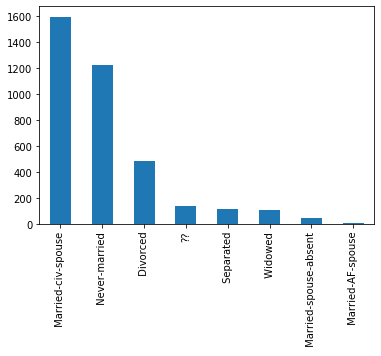

In [31]:
data["marital-status"].value_counts().plot(kind='bar')
"NaN: "+str(data["marital-status"].isnull().sum())

***marital status***

Atribút má množstvo chýbajúcich hodnôt - buď hodnotu *??* alebo prázdne záznamy. Chýbajúce hodnoty bude pravdepodobne možné doplniť na základe atribútu *relationship*, prípadne iných.

'NaN: 12'

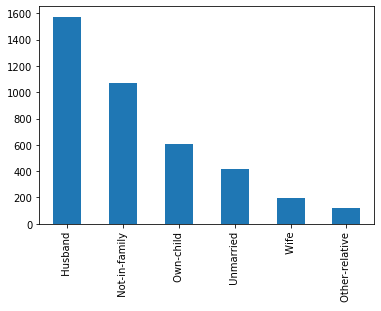

In [32]:
data["relationship"].value_counts().plot(kind='bar')
"NaN: "+str(data["relationship"].isnull().sum())

***relationship***

Atribút má 12 prázdnych záznamov, pravdepodobne ich bude možné doplniť na základe pohlavia, veku a rodinného stavu

## Tehotenstvo

In [33]:
data["pregnant"].value_counts(dropna=False)

f        3504
F         202
FALSE     182
t          71
NaN        12
T           9
TRUE        3
Name: pregnant, dtype: int64

Atribút obsahuje informáciu o tom, či je osoba tehotná. Hodnoty však majú nejednotný formát.

Bude potrebné zjednotiť hodnoty *f*,*F*,*FALSE* a *t*,*T*,*TRUE*. Okrem toho bude nutné doplniť 12 prázdnych hodnôt.

## Dosiahnuté vzdelanie

In [34]:
data["education"].value_counts(dropna=False).rename("count").rename_axis("education").reset_index().sort_values("education", ascending=False)

,education,count
9,Some_college,95
1,Some-college,815
23,Prof_school,4
11,Prof-school,64
19,Preschool,10
3,Masters,207
6,HS_grad,123
0,HS-grad,1156
14,Doctorate,46
2,Bachelors,661


***education***

Atribút obsahuje množstvo zduplikovaných hodnôt. Bude potrebné zjednotiť:
- *Some_college* a *Some-college*
- *Prof_school* a *Prof-school*
- *HS_grad* a *HS-grad*
- *Assoc_voc* a *Assoc-voc*
- *Assoc_acdm* a *Assoc-acdm*
- *7th_8th* a *7th-8th*
- *5th_6th* a *5th-6th*
- *1st_4th* a *1st-4th*

Tiež sa tu nachádza 18 prázdnych hodnôt.

Možné hodnoty môžeme zoradiť podľa úrovne vzdelania a priradiť im číselne hodnoty aby sa s nimi jednoduchšie pracovalo.

1. Preschool
1. 1st-4th
1. 5th-6th
1. 7th-8th
1. 9th
1. 10th
1. 11th
1. 12th
1. HS-grad
1. Some-college
1. Assoc-voc
1. Assoc-acdm
1. Bachelors
1. Masters
1. Prof-school
1. Doctorate

In [35]:
data["education-num"].value_counts(dropna=False).rename("count").rename_axis("education-num").reset_index().sort_values("education-num", ascending=False)

,education-num,count
45,1600.0,1
25,1500.0,8
21,1400.0,12
20,1300.0,21
40,1200.0,2
27,1100.0,8
15,1000.0,41
11,900.0,56
42,800.0,1
28,700.0,7


***education-num***

Hodnoty tohto atribútu sú celé čísla ktoré spadajú do troch intervalov:
- <1;16>
- <200;1600>
- <-1600;-200>

Pravdepodobne sa jedná o nekonzistentné formáty s posunutými desatinnými čiarkami alebo pridaným znakom mínus. Je možné že tento atribút súvisí s atribútom *education* ktorý má po úprave tiež 16 rôznych hodnôt.

Tiež tu bude nutné doplniť 413 prázdnych záznamov.

## Financie

TODO: capital loss, capital gain

## Zamestnanie

 <=50K    3039
 >50K      925
NaN         19
Name: income, dtype: int64

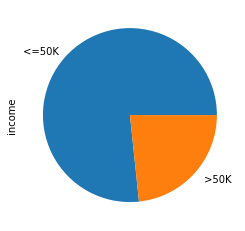

In [36]:
data["income"].value_counts().plot(kind='pie')
data["income"].value_counts(dropna=False)

***income***

Príjem má len dve možné hodnoty, tých čo zarábajú aspoň 50 000$, a tých čo zarábajú menej. 

In [37]:
data["occupation"].value_counts(dropna=False)

 Prof-specialty       508
 Exec-managerial      479
 Craft-repair         476
 Adm-clerical         474
 Sales                457
 Other-service        396
 Machine-op-inspct    261
 ?                    238
 Transport-moving     182
 Handlers-cleaners    170
 Farming-fishing      119
 Tech-support         112
 Protective-serv       72
 Priv-house-serv       22
NaN                    16
 Armed-Forces           1
Name: occupation, dtype: int64

***occupation***

Hodnoty vyzerajú byť v poriadku, až na 16 chýbajúcich, ktoré by malo byť možné doplniť na základe ostatných atribútov ktoré sa týkajú zamestnania.

count    3969.000000
mean       40.128748
std        12.101524
min         1.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: hours-per-week, dtype: float64

'NaN: 14'

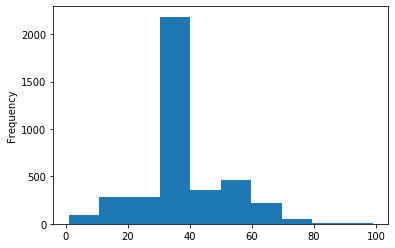

In [38]:
display(data["hours-per-week"].describe())
display(data["hours-per-week"].plot(kind = 'hist'))
"NaN: "+str(data["hours-per-week"].isnull().sum())

***hours-per-week***

Nachádzajú sa tu celé čísla v intervale <1;99>. Tiež tu je 14 prázdnych hodnôt.

In [39]:
data["workclass"].value_counts(dropna=False)

 Private             2465
private               272
 Self-emp-not-inc     269
 Local-gov            237
 ?                    214
 State-gov            134
 Self-emp-inc         128
 Federal-gov          117
self-emp-not-inc       35
local-gov              29
?                      24
NaN                    18
self-emp-inc           17
state-gov              12
federal-gov             8
 Without-pay            3
 Never-worked           1
Name: workclass, dtype: int64

***workclass***

Hodnoty bude potrebné dať do jednotného formátu, niektoré sú totiž zdvojené kvôli rôznym veľkostiam písmen a medzerám na začiatku. Tiež tu sú tri druhy prázdnych hodnôt ("?"," ?",NaN).

## Agregované hodnoty nameranej hladiny glukózy

TODO  
 - skewness_glucose
 - mean_glucose
 - kurtosis_glucose
 - std_glucose

## Zdravotné informácie

In [40]:
display(data["medical_info"].head(5))
"NaN: "+str(data["hours-per-week"].isnull().sum())

0             {'mean_oxygen':'0.790133779','std_oxygen':'10.13249696','kurtosis_oxygen':'17.68151382','skewness_oxygen':'374.9257754'}
1             {'mean_oxygen':'18.69147157','std_oxygen':'51.21049055','kurtosis_oxygen':'2.541428789','skewness_oxygen':'4.930561896'}
2             {'mean_oxygen':'1.150501672','std_oxygen':'11.49825164','kurtosis_oxygen':'16.48789423','skewness_oxygen':'320.6702352'}
3    {'mean_oxygen':'0.387123746','std_oxygen':'8.683190316000001','kurtosis_oxygen':'25.389201','skewness_oxygen':'685.06342239999...
4                {'mean_oxygen':'0.945652174','std_oxygen':'12.0495586','kurtosis_oxygen':'14.8422644','skewness_oxygen':'245.358921'}
Name: medical_info, dtype: object

'NaN: 14'

Tento atribút obsahuje objekt v json formáte ktorý má 4 atribúty:
- mean_oxygen
- std_oxygen
- kurtosis_oxygen
- skewness_oxygen

Jedná sa o agregované hodnoty nameranej hladiny kyslíku v krvi. Pri ďalšom postupe bude potrebné tieto json objekty rozparsovať a ich atribúty zmeniť na normálne atribúty tabuľky.

Nachádza sa tu 14 prázdnych hodnôt, jednotlivé objekty však môžu obsahovať ešte ďalšie prázdne atribúty.

## Atribút *fnlwgt*

count      3969.000000
mean     187324.615520
std      104811.125897
min       19491.000000
25%      115932.000000
50%      177083.000000
75%      234901.000000
max      953588.000000
Name: fnlwgt, dtype: float64

'NaN: 14'

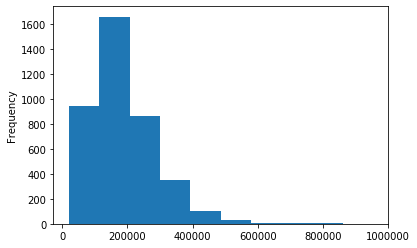

In [41]:
data["fnlwgt"].plot(kind='hist')
display(data["fnlwgt"].describe())
"NaN: "+str(data["hours-per-week"].isnull().sum())

V tomto atribúte sú číselné hodnoty pohybujúce sa v intervale <19491; 953588>. Nie je nám však zatiaľ jasné čo má reprezentovať. Tiež tu je 14 prázdnych hodnôt.

## Reálna prítomnosť cukrovky

0.0    2962
1.0    1010
NaN      11
Name: class, dtype: int64

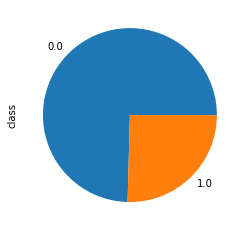

In [42]:
data["class"].value_counts().plot(kind='pie')
data["class"].value_counts(dropna=False)

Tento atribút reprezentuje reálnu prítomnosť cukrovky u daného človeka. Má dve možné hodnoty, kde 1 znamená že cukrovka je prítomná a 0 nie.
Tiež tu je 14 prázdnych záznamov ktoré nakoniec budeme z datasetu musieť odstrániť, lebo nám v predikovaní cukrovky nepomôžu. Predtým ale môžeme záznamy týchto ľudí využiť pri dopĺňaní prázdnych hodnôt v ostatných atribútoch.


# Hypotézy

### Ľudia ktorí trpia cukrovkou budú mať v priemere vyššiu hladinu cukru v krvi ako tí ktorí ňou netrpia

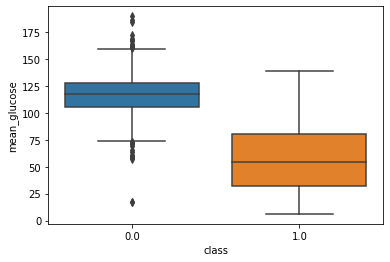

In [43]:
sns.boxplot('class', 'mean_glucose', data=data)

Na grafe vidíme že hypotéza bola potvrdená.

# Párová analýza

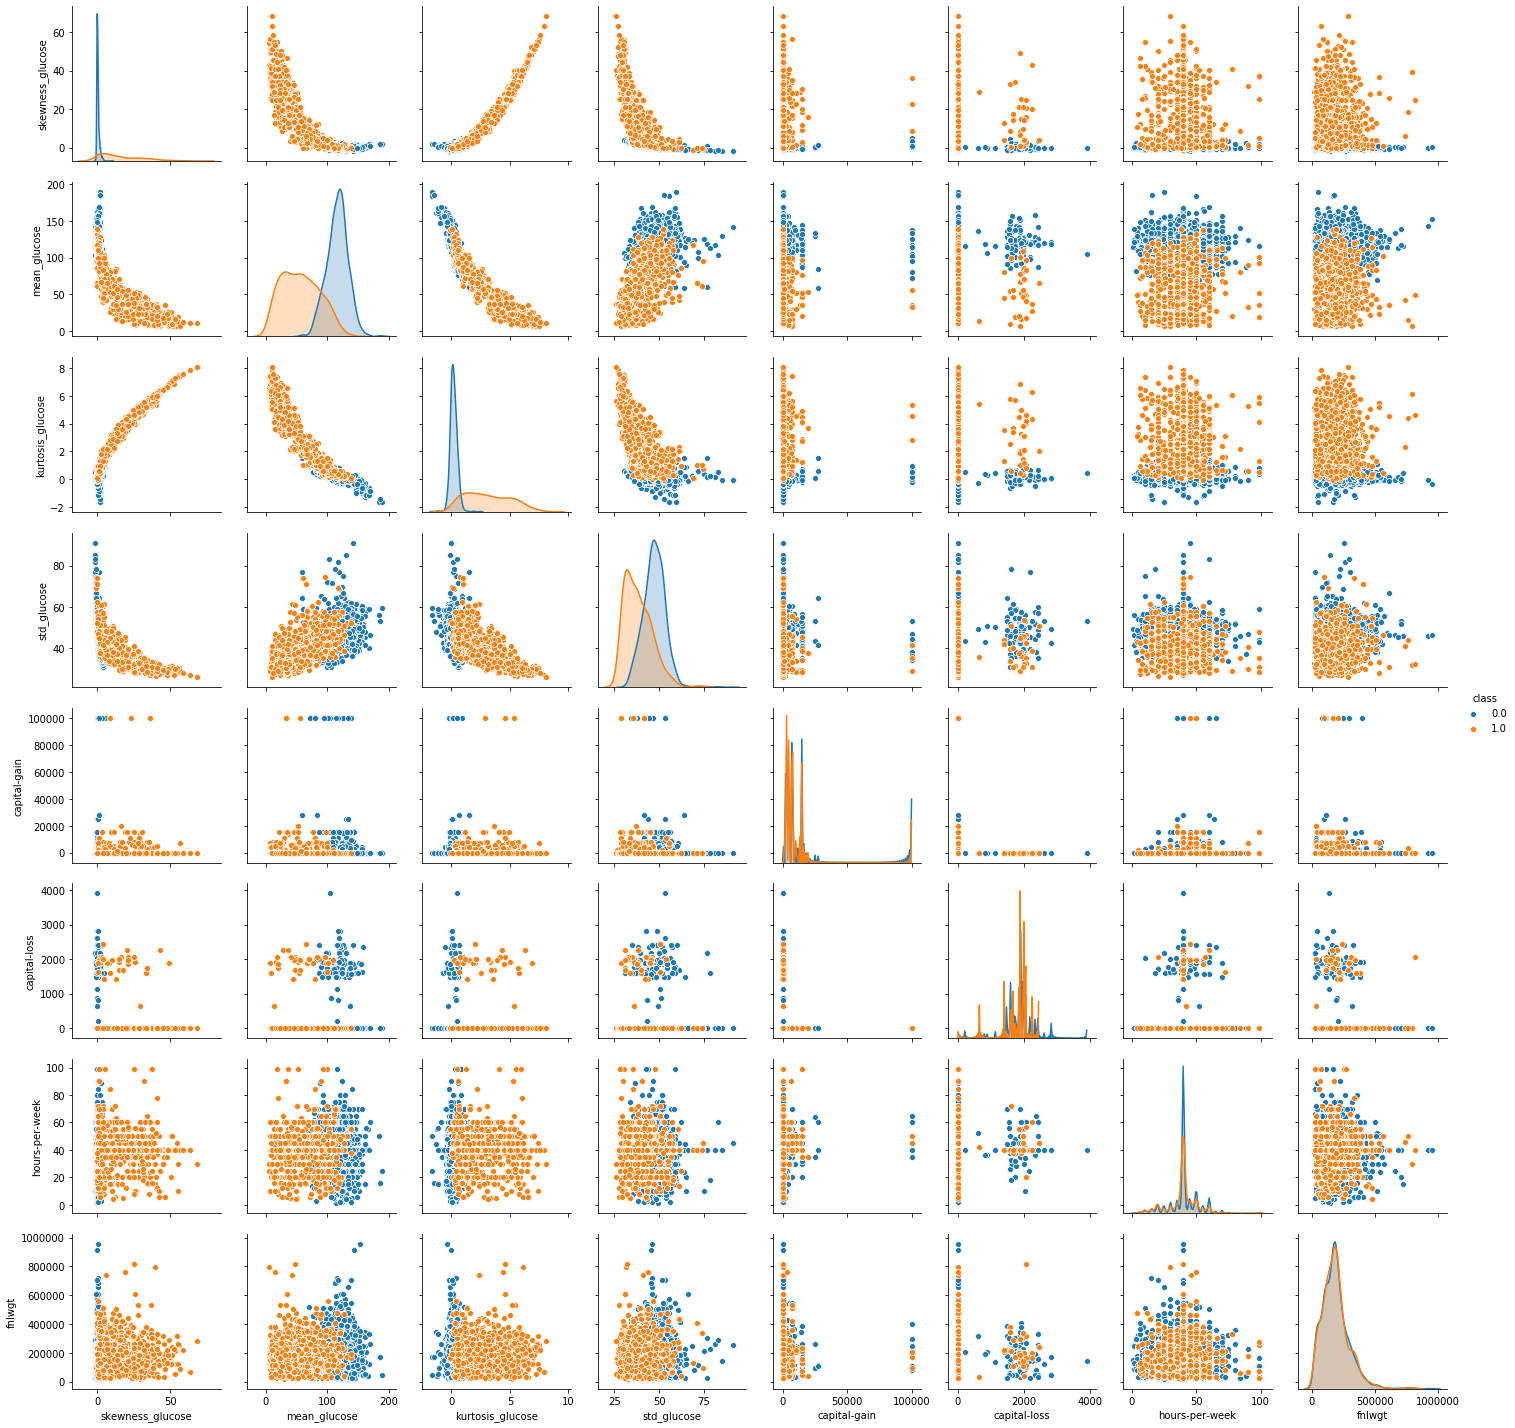

In [44]:
sns.pairplot(data.dropna(), hue="class", vars=['skewness_glucose', 'mean_glucose','kurtosis_glucose','std_glucose','capital-gain','capital-loss','hours-per-week','fnlwgt'])

Vytvorili sme si tabuľku párových grafov všetkých číselných atribútov okrem *education-num* lebo tam sú hodnoty moc špinavé na to, aby nám dali zmysluplné informácie.

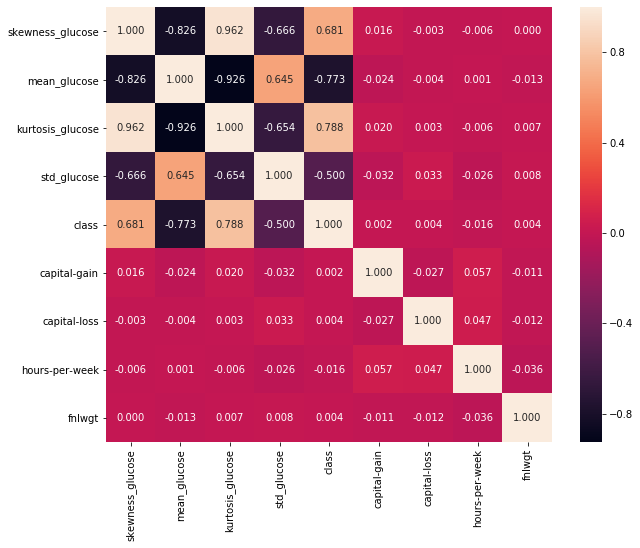

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[['skewness_glucose', 'mean_glucose','kurtosis_glucose','std_glucose','class','capital-gain','capital-loss','hours-per-week','fnlwgt']].corr(), ax=ax, annot=True, fmt=".3f")

# Identifikácia a riešenie problémov s dátami

Problémy sú podrobnejšie opísané vyššie pre každý atribút samostatne, ich zhrnutie je ale takéto:
- rozdeliť *medical-data* na stĺpce
- odstránenie duplikovaných záznamov
- spojenie dvoch datasetov
- opravenie nekonzistentných hodnôt v jednotlivých atribútoch (veľkosti písmen, otázniky namiesto NaN, medzery, čiarky, podtržníky...)
- odstránenie záznamov s prázdnym atribútom *class*
- nahradenie prázdnych hodnôt pre jednotlivé atribúty

# ---------------------------------------------------------------------------
Todo:

doplnit prvy dataset(age,sex,d_o_b) 

dopnit druhy dataset
- (pridat do kapitoly financie)
 - kapitálove príjmy (capital-gain)
 - kapitálová strata (capital-loss)


- (pridat do agregovane hodnoty glukozy)

 - skewness_glucose
 - mean_glucose
 - kurtosis_glucose
 - std_glucose
 
 
spravit 2.hypotezu
 
doplnit parovu analyzu
 

- Každý z nás spraví po jednej hypotéze.
- Čo sa týka identifikácie problémov s dátami, môžeme to spraviť tak, ako si vravel ty, že ty si zoberieš prvú polku, ja druhú. Treba tam popísať problémy s dátami. Vykresliť grafy, či nám nejaké hodnoty nelietajú straaaašne mimo :D a nakoniec navrhúť riešenia na vyčistenie dát.
- Párová analýza: treba spraviť heatmap, ktorá ti ukazuje korelácie medzi údajmi. a zisťovať, čo môže mať dopad na to, či je človek má cukrovku alebo nie.
